In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import isqrt
delim = ';'



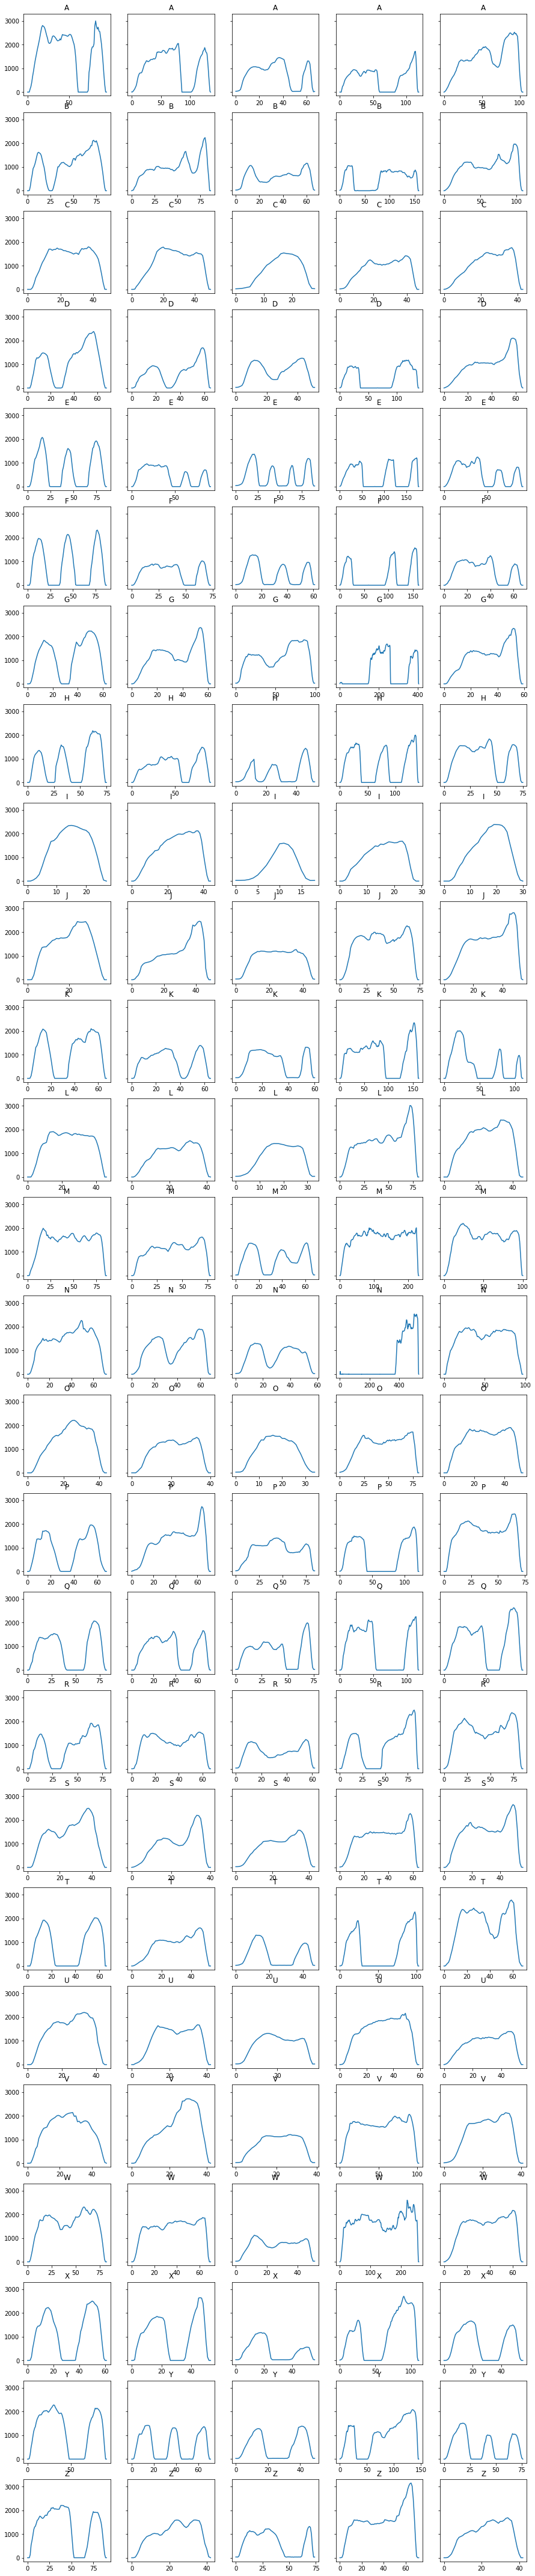

In [2]:

count = 5

plt_in_row = 5

fig, axs = plt.subplots(26, plt_in_row, figsize=(3*plt_in_row, 3*26), sharey=True)
    
for j,k in zip(range(1,27), range(65,91)):
    thresh = 50
    isOver = False
    num = j
    letter = chr(k)
    filename = f'{num}{letter}.csv'
    for i in range(0, count):
        path = f'/opt/iui-datarelease1-sose2021/{i}/split_letters_csv/{filename}'
        try:
            ex_letter = pd.read_csv(path, delim)
            
        except:
            continue
           #arcmax arcmin numpy.where , von hinten laufen und thresh
        f = ex_letter['Force'] 
       
        f_over_T = 0
       
        for a in range (  0, len(f) ):
            if(f[a]>thresh):
                f_over_T = a
                isOver = True
                break
        f_Short = []
        f_final = []
        for x in range(f_over_T-3, len(f)):
            f_Short.append(f[x])
        
        isOver= False
        
        for y in range ((len(f_Short)-1),0, -1):
            if(f_Short[y]> thresh):
                f_over_T = y
                isOver = True
                break
        for z in range(0, f_over_T+3):
            f_final.append(f_Short[z])
        
      # print (len(f_Short), " ", len(f_final))
      
        isOver = False
        temp_axs = axs[j-1][i%plt_in_row]
        temp_axs.title.set_text(f'{letter}')
        temp_axs.plot(f_final)
    
plt.savefig('./single_first_five.png')

In [3]:
count = 10

numxalph = np.array(np.meshgrid(range(65,91), range(0,4)))[0].flatten() # I swear there must be a more efficient method to this...

In [4]:
def shorten(npList):
    temp        = npList
    thresh      = 100
    temp_over_T = 0
    isOver      = False
    temp_short  = []
    temp_final  = []
    
    for a in range (0, len(temp) ):
        if(temp[a]>thresh):
            temp_over_T = a
            isOver      = True
            break
    
    for x in range(temp_over_T-3, len(temp)):
        temp_short.append(f[x])
        
    isOver = False
        
    for y in range ((len(temp_short)-1),0, -1):     
        if(temp_short[y] > thresh):
            temp_over_T  = y
            isOver       = True
            break
        
    for z in range(0, temp_over_T+1):
        temp_final.append(temp_short[z])
    
    temp_final.append(0)
    return temp_final
    

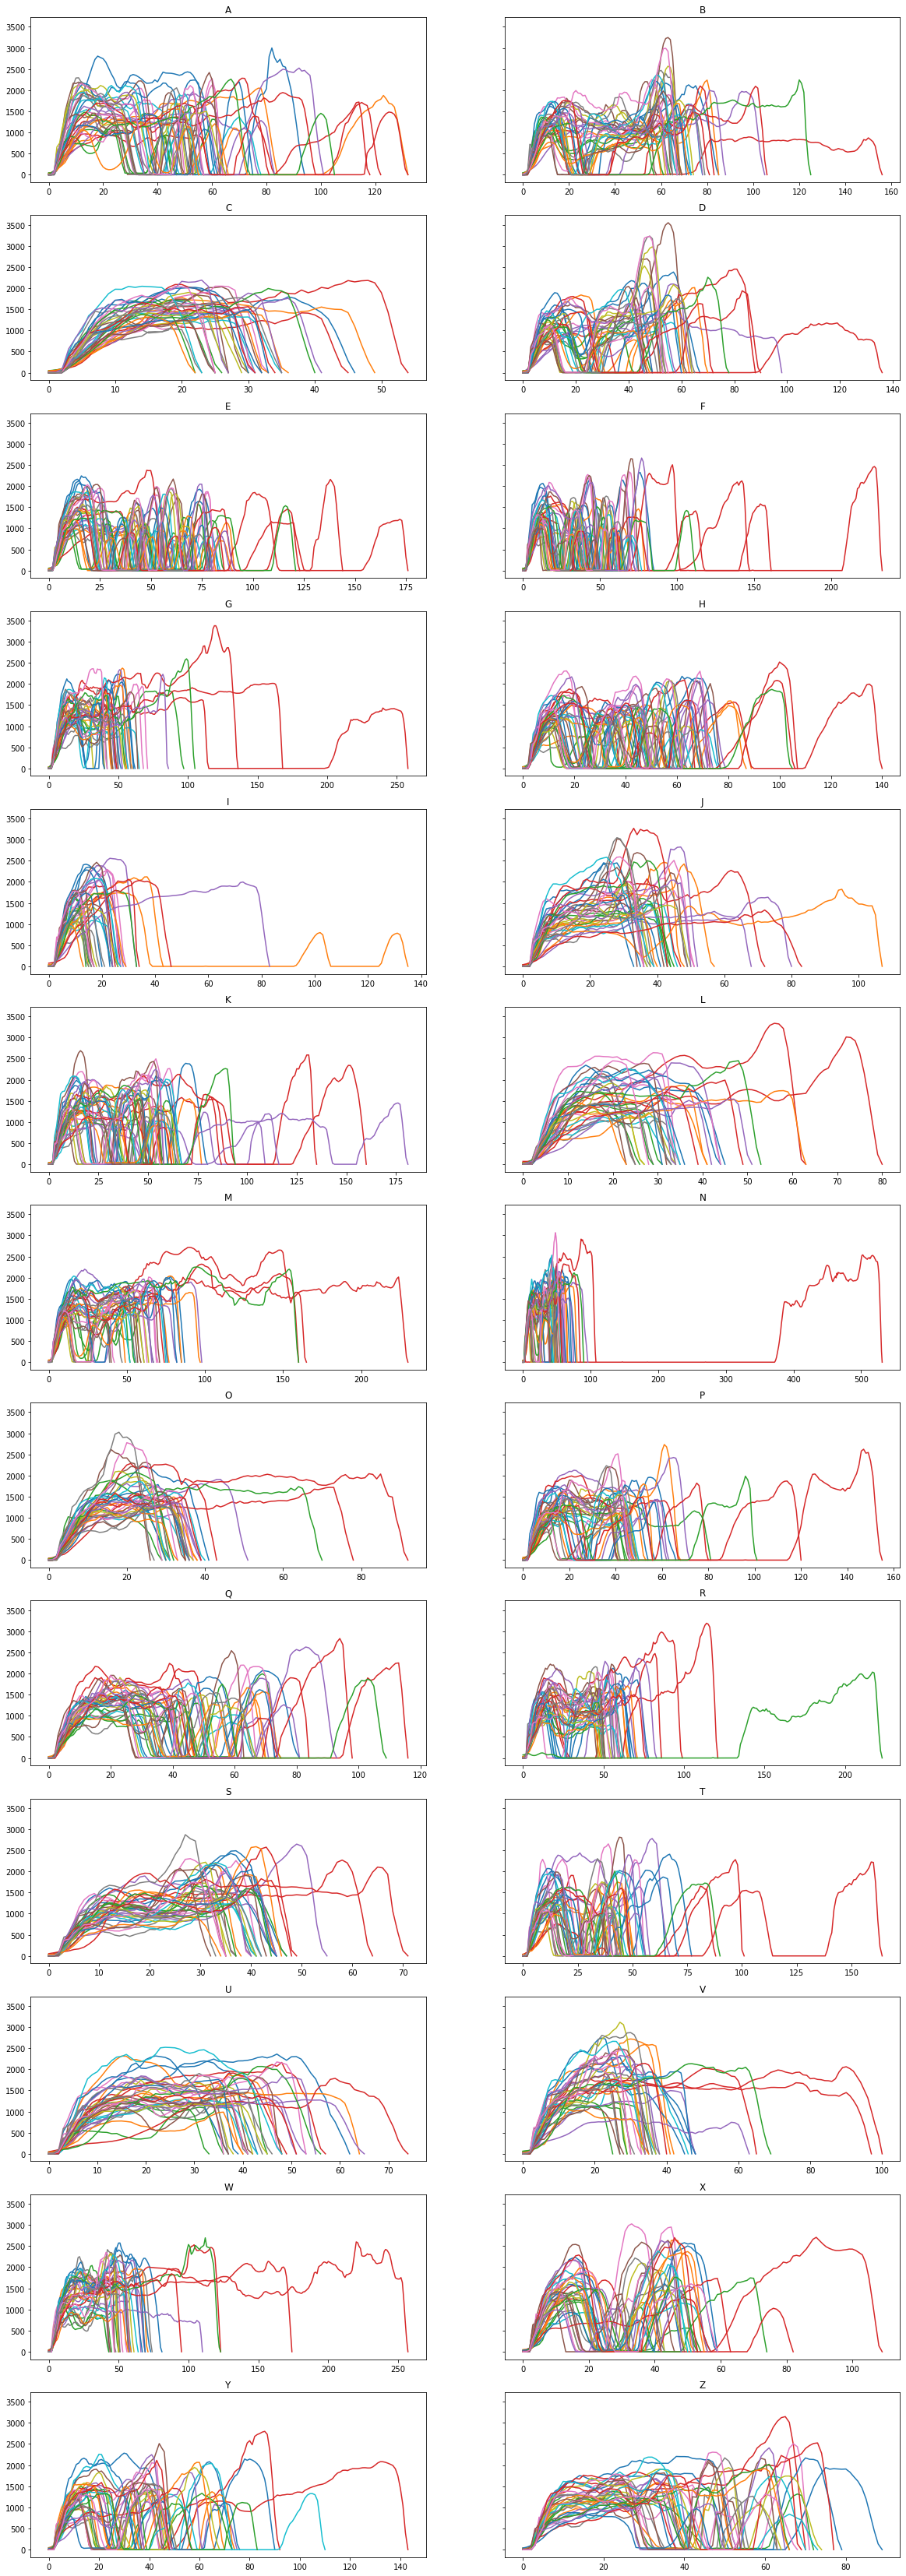

In [5]:
fig, axs = plt.subplots(13,2,figsize=(20, 60), sharey=True)

for j,k in zip(range(1,105),numxalph):
    num = j
    letter = chr(k)
    filename = f'{num}{letter}.csv'
    r = int((j-1)/2)%13
    c = (j-1)%2
    for i in range(0, count):
        path = f'/opt/iui-datarelease1-sose2021/{i}/split_letters_csv/{filename}'
        try:
            ex_letter = pd.read_csv(path, delim)
        except:
            continue
        f = ex_letter['Force']
        f_short = shorten(f)
     
        idx = (f > 100) | (f == 0)
        f=f[idx]
        t=ex_letter['Millis']-ex_letter['Millis'][0]
        t=t[idx]
        axs[r][c].title.set_text(f'{letter}')
        axs[r][c].plot(f_short)
plt.savefig('./ten_force_entries_all_alphs.png')